In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Construction

In [2]:
n_inputs = 1
n_hidden1 = 20
n_outputs = 1

In [3]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None))

In [4]:
hidden1 = tf.contrib.layers.fully_connected(X, n_hidden1, activation_fn=tf.nn.elu)
output = tf.contrib.layers.fully_connected(hidden1, n_outputs, activation_fn=None)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
with tf.name_scope('loss'):
    loss = tf.losses.mean_squared_error(y, output)

Instructions for updating:
Use tf.cast instead.


In [6]:
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer().minimize(loss)
#     optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
#     optimizer = tf.train.MomentumOptimizer(learning_rate=0.005, momentum=0.9).minimize(loss)

Instructions for updating:
Use tf.cast instead.


# Execution - sin

In [7]:
init = tf.global_variables_initializer()

1.6315069
0.5538488
0.46439928
0.29756537
0.21308284
0.09663858
0.045986764
0.030759344
0.019953728
0.016675776


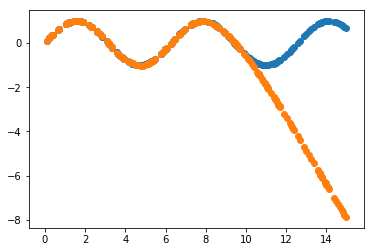

In [8]:
n_epochs = 30000

with tf.Session() as sess:
    sess.run(init)
    for epoch in range (0, n_epochs):
        value = np.random.rand(200, 1) * 10 #domain 0, 10
        label = np.sin(value)
        sess.run(optimizer, feed_dict={X:value, y: label})
        if epoch % 3000 == 0:
            acc = loss.eval(feed_dict={X:value, y: label})
            print(np.sqrt(acc))
    #final predictions and graph plot
    values = np.random.rand(200, 1) * 15
    actual = np.sin(values)
    predictions = output.eval(feed_dict={X: values})
    plt.scatter(values, actual)
    plt.scatter(values, predictions)

# Execution - x^2

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range (0, epoch):
        value = np.random.rand(200, 1) * 10
        label = np.square(value)
        sess.run(optimizer, feed_dict={X:value, y: label})
        if epoch % 3000 == 0:
            acc = loss.eval(feed_dict={X:value, y: label})
            print(np.sqrt(acc))
    #final predictions and graph plot
    values = np.random.rand(200, 1) * 20
    actual = np.square(values)
    predictions = output.eval(feed_dict={X: values})
    plt.scatter(values, actual)
    plt.scatter(values, predictions)

44.857044
